In [1]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelEncoder, StandardScaler


In [2]:
import pydot
import graphviz
print("Successfully imported!")


Successfully imported!


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Load dataset
df = pd.read_csv("../data/selected_features.csv")

# Encode labels
le = LabelEncoder()
y = le.fit_transform(df['target'])

# Train-Test Split
X = df.drop(columns=['target']).values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:
import json  # ✅ Add this at the top
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Define the FNN model
fnn_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
fnn_model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history_fnn = fnn_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=32)

# Save the model in HDF5 format (legacy but still supported)
fnn_model.save("../models/fnn_model.h5")

# Save training history
with open("../models/fnn_history.json", "w") as f:
    json.dump(history_fnn.history, f)


Epoch 1/50
544/544 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.5039 - loss: 119.9852 - val_accuracy: 0.5041 - val_loss: 0.8121
Epoch 2/50
544/544 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5044 - loss: 1.9816 - val_accuracy: 0.4998 - val_loss: 0.7108
Epoch 3/50
544/544 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4861 - loss: 0.9433 - val_accuracy: 0.4972 - val_loss: 0.7000
Epoch 4/50
544/544 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5050 - loss: 0.7753 - val_accuracy: 0.5005 - val_loss: 0.7003
Epoch 5/50
544/544 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5078 - loss: 0.7461 - val_accuracy: 0.4945 - val_loss: 0.7141
Epoch 6/50
544/544 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.5066 - loss: 0.7355 - val_accuracy: 0.5009 - val_loss: 0.6984
Epoch 7/50
544/544 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.4991 - loss: 0.7394 - val_accuracy: 0.5009 - val_loss: 0.6929
Epoch 8/50
544/544 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4980 - loss: 0.7177 - val_accuracy: 

In [9]:
import json
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam

# Reshape input for LSTM
X_train_LSTM = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_LSTM = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Define the LSTM model
lstm_model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(1, X_train.shape[1])),
    LSTM(32),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
lstm_model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history_lstm = lstm_model.fit(X_train_LSTM, y_train, validation_data=(X_test_LSTM, y_test), epochs=50, batch_size=32)

# Save the model (you can use .keras instead of .h5 if you prefer)
lstm_model.save("../models/lstm_model.h5")

# Save training history
with open("../models/lstm_history.json", "w") as f:
    json.dump(history_lstm.history, f)


Epoch 1/50
544/544 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.5356 - loss: 0.6900 - val_accuracy: 0.5354 - val_loss: 0.6901
Epoch 2/50
544/544 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.5446 - loss: 0.6875 - val_accuracy: 0.5456 - val_loss: 0.6884
Epoch 3/50
544/544 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.5477 - loss: 0.6883 - val_accuracy: 0.5456 - val_loss: 0.6871
Epoch 4/50
544/544 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.5472 - loss: 0.6871 - val_accuracy: 0.5449 - val_loss: 0.6880
Epoch 5/50
544/544 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.5500 - loss: 0.6881 - val_accuracy: 0.5502 - val_loss: 0.6882
Epoch 6/50
544/544 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.5477 - loss: 0.6893 - val_accuracy: 0.5426 - val_loss: 0.6891
Epoch 7/50
544/544 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.5343 - loss: 0.6899 - val_accuracy: 0.5467 - val_loss: 0.6894
Epoch 8/50
544/544 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.5396 - loss: 0.6896 - val_accuracy: 0.

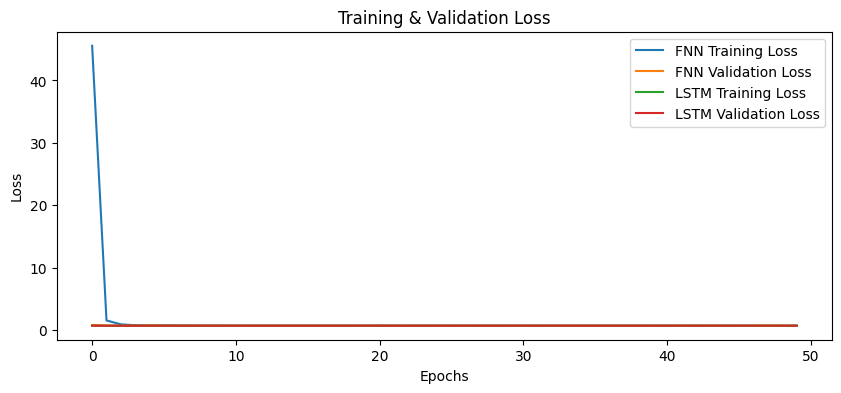

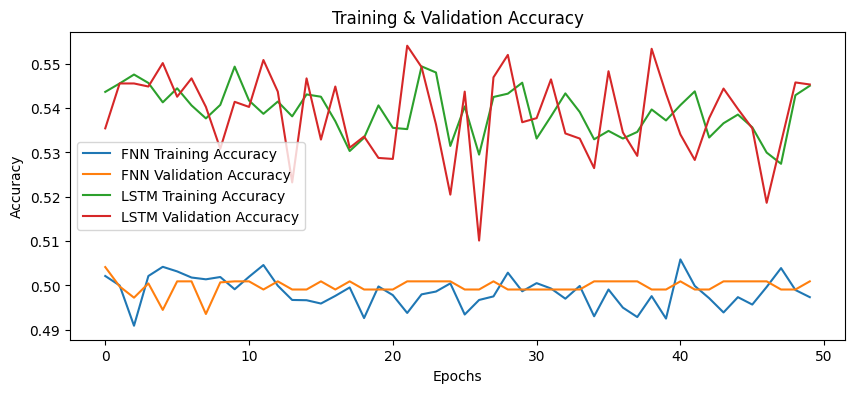

In [11]:
import json
import matplotlib.pyplot as plt

# Load saved training histories
with open("../models/fnn_history.json", "r") as f:
    fnn_history = json.load(f)

with open("../models/lstm_history.json", "r") as f:
    lstm_history = json.load(f)

# Plot Loss
plt.figure(figsize=(10, 4))
plt.plot(fnn_history["loss"], label="FNN Training Loss")
plt.plot(fnn_history["val_loss"], label="FNN Validation Loss")
plt.plot(lstm_history["loss"], label="LSTM Training Loss")
plt.plot(lstm_history["val_loss"], label="LSTM Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training & Validation Loss")
plt.legend()
plt.show()

# Plot Accuracy
plt.figure(figsize=(10, 4))
plt.plot(fnn_history["accuracy"], label="FNN Training Accuracy")
plt.plot(fnn_history["val_accuracy"], label="FNN Validation Accuracy")
plt.plot(lstm_history["accuracy"], label="LSTM Training Accuracy")
plt.plot(lstm_history["val_accuracy"], label="LSTM Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training & Validation Accuracy")
plt.legend()
plt.show()


136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


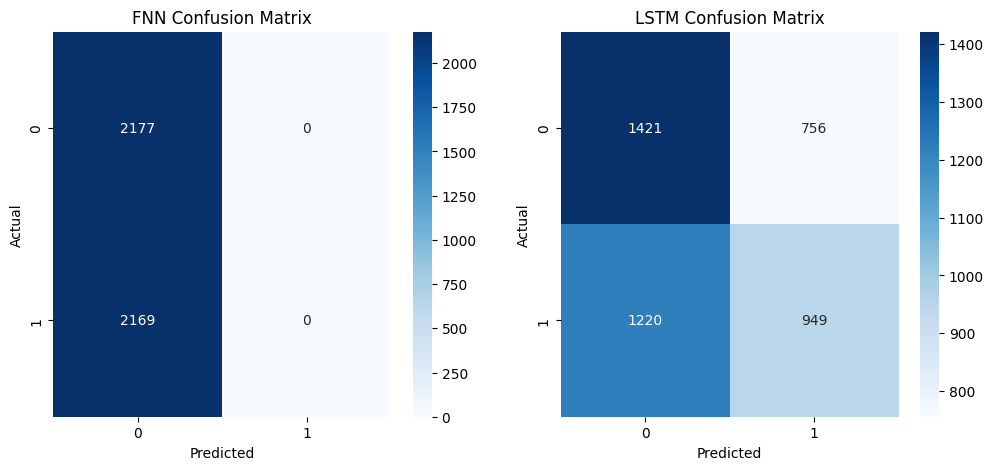

In [12]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Get predictions
fnn_preds = (fnn_model.predict(X_test) > 0.5).astype(int).flatten()
lstm_preds = (lstm_model.predict(X_test_LSTM) > 0.5).astype(int).flatten()

# Confusion matrices
fnn_cm = confusion_matrix(y_test, fnn_preds)
lstm_cm = confusion_matrix(y_test, lstm_preds)

# Plot
fig, axes = plt.subplots(1, 2, figsize=(12,5))

sns.heatmap(fnn_cm, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title("FNN Confusion Matrix")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

sns.heatmap(lstm_cm, annot=True, fmt='d', cmap='Blues', ax=axes[1])
axes[1].set_title("LSTM Confusion Matrix")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")

plt.show()
